In [1]:

import xarray as xr

store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/HadISST-feedstock/hadisst.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})


In [2]:
import xarray as xr

store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/HadISST-feedstock/hadisst.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})

# 1️⃣ 查看数据集的整体结构
print(ds)

# 2️⃣ 查看所有变量名称
print("变量列表：", list(ds.data_vars))

# 3️⃣ 查看坐标维度信息
print("坐标信息：", list(ds.coords))

# 4️⃣ 查看某个主要变量（例如SST）的详细信息
print(ds['sst'])

# 5️⃣ （可选）查看前几行数据
print(ds['sst'].isel(time=0))  # 查看第一个时间片


<xarray.Dataset> Size: 474MB
Dimensions:    (time: 1829, latitude: 180, longitude: 360, nv: 2)
Coordinates:
  * time       (time) datetime64[ns] 15kB 1870-01-16T11:59:59.505615234 ... 2...
  * latitude   (latitude) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    sst        (time, latitude, longitude) float32 474MB dask.array<chunksize=(1829, 180, 360), meta=np.ndarray>
    time_bnds  (time, nv) float32 15kB dask.array<chunksize=(1829, 2), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.0
    Title:                      Monthly version of HadISST sea surface temper...
    comment:                    Data restrictions: for academic research use ...
    description:                HadISST 1.1 monthly average sea surface tempe...
    history:                    22/7/2022 converted to netcdf from pp format
    institution:               

In [3]:
import xarray as xr
import pandas as pd

store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/HadISST-feedstock/hadisst.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})

# 提取时间维度
time = ds['time'].to_index()

# 打印前10个时间点
print("前10个时间点：")
print(time[:10])

# 查看数据的时间范围
print("\n时间范围：", time.min(), "至", time.max())

# 计算时间间隔
diffs = time.to_series().diff().dropna()
print("\n平均时间间隔：", diffs.mean())

# 检查是否是月度数据
print("\n唯一时间间隔统计：")
print(diffs.value_counts())


前10个时间点：
DatetimeIndex(['1870-01-16 11:59:59.505615234',
               '1870-02-14 23:59:59.340820312',
               '1870-03-16 11:59:59.340820312',
               '1870-04-15 23:59:59.340820312',
                         '1870-05-16 12:00:00',
                         '1870-06-16 00:00:00',
                         '1870-07-16 12:00:00',
                         '1870-08-16 12:00:00',
                         '1870-09-16 00:00:00',
                         '1870-10-16 12:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)

时间范围： 1870-01-16 11:59:59.505615234 至 2022-05-16 12:00:00

平均时间间隔： 30 days 10:27:50.022152289

唯一时间间隔统计：
time
30 days 12:00:00              1134
31 days 00:00:00               377
29 days 12:00:00               242
30 days 00:00:00                58
28 days 00:00:00                11
29 days 00:00:00                 4
30 days 12:00:00.659179688       1
29 days 11:59:59.835205078       1
Name: count, dtype: int64


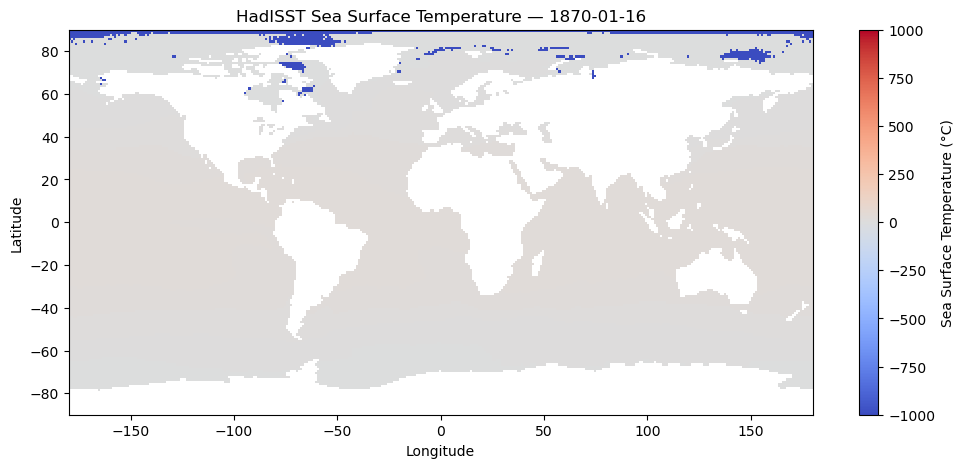

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

# 载入 HadISST 数据
store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/HadISST-feedstock/hadisst.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})

# 提取第一个时间点的 SST（一般是1870年1月）
sst = ds['sst'].isel(time=0)

# 画图
plt.figure(figsize=(12,5))
sst.plot(
    cmap='coolwarm',
    cbar_kwargs={'label': 'Sea Surface Temperature (°C)'}
)
plt.title(f"HadISST Sea Surface Temperature — {str(ds['time'].values[0])[:10]}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [3]:
print("变量名：", list(ds.coords))
print("经度范围:", float(ds.longitude.min()), "→", float(ds.longitude.max()))


变量名： ['latitude', 'longitude', 'time']
经度范围: -179.5 → 179.5


In [5]:
print(ds.coords)
print("经度最小值:", float(ds.longitude.min()))
print("经度最大值:", float(ds.longitude.max()))
print("纬度最小值:", float(ds.latitude.min()))
print("纬度最大值:", float(ds.latitude.max()))


Coordinates:
  * time       (time) datetime64[ns] 15kB 1870-01-16T11:59:59.505615234 ... 2...
  * latitude   (latitude) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
经度最小值: -179.5
经度最大值: 179.5
纬度最小值: -89.5
纬度最大值: 89.5


In [12]:
import xarray as xr

# -------------------------------
# 1️⃣ 打开HadISST Zarr数据
# -------------------------------
store = "https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/HadISST-feedstock/hadisst.zarr"
ds = xr.open_dataset(store, engine="zarr", chunks={})

print("✅ 成功读取HadISST数据")
print("经度范围:", float(ds.longitude.min()), "→", float(ds.longitude.max()))
print("纬度范围:", float(ds.latitude.min()), "→", float(ds.latitude.max()))

# -------------------------------
# 2️⃣ 选择时间范围 (1980–2020)
# -------------------------------
ds_sel = ds.sel(time=slice("1980-01-01", "2020-12-31"))

# -------------------------------
# 3️⃣ 检查纬度方向并选择热带区域
# -------------------------------
lat_values = ds.latitude.values
if lat_values[0] > lat_values[-1]:
    # 纬度是降序的（北到南）
    print("🌎 检测到纬度为降序排列 → 使用 slice(23.5, -23.5)")
    ds_tropics = ds_sel.sel(latitude=slice(23.5, -23.5))
else:
    # 纬度是升序的（南到北）
    print("🌎 纬度为升序排列 → 使用 slice(-23.5, 23.5)")
    ds_tropics = ds_sel.sel(latitude=slice(-23.5, 23.5))

# -------------------------------
# 4️⃣ 提取太平洋区域（100°E–280°E）
# -------------------------------
ds_west = ds_tropics.sel(longitude=slice(100, 179.5))
ds_east = ds_tropics.sel(longitude=slice(-179.5, -60))
ds_east = ds_east.assign_coords(longitude=ds_east.longitude + 360)

print("西太平洋点数:", ds_west.longitude.size)
print("东太平洋点数:", ds_east.longitude.size)

# -------------------------------
# 5️⃣ 拼接
# -------------------------------
ds_pacific = xr.concat([ds_west, ds_east], dim="longitude")

# -------------------------------
# 6️⃣ 提取 SST
# -------------------------------
sst = ds_pacific["sst"]

# -------------------------------
# 7️⃣ 验证
# -------------------------------
print("✅ SST维度:", sst.shape)
print("纬度范围:", float(sst.latitude.min()), "→", float(sst.latitude.max()))
print("经度范围:", float(sst.longitude.min()), "→", float(sst.longitude.max()))
print("时间范围:", str(sst.time.values[0])[:10], "→", str(sst.time.values[-1])[:10])

# -------------------------------
# 8️⃣ 保存
# -------------------------------
sst.to_netcdf("SST_TropicalPacific_1980_2020.nc")
print("✅ 已保存: SST_TropicalPacific_1980_2020.nc")


✅ 成功读取HadISST数据
经度范围: -179.5 → 179.5
纬度范围: -89.5 → 89.5
🌎 检测到纬度为降序排列 → 使用 slice(23.5, -23.5)
西太平洋点数: 80
东太平洋点数: 120
✅ SST维度: (492, 48, 200)
纬度范围: -23.5 → 23.5
经度范围: 100.5 → 299.5
时间范围: 1980-01-16 → 2020-12-16


/tmp/ipykernel_2891/201665942.py:44: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds_pacific = xr.concat([ds_west, ds_east], dim="longitude")


✅ 已保存: SST_TropicalPacific_1980_2020.nc


In [11]:
print("纬度前5个值:", ds.latitude.values[:5])
print("纬度后5个值:", ds.latitude.values[-5:])


纬度前5个值: [89.5 88.5 87.5 86.5 85.5]
纬度后5个值: [-85.5 -86.5 -87.5 -88.5 -89.5]
